# Applied Machine learning in Python

Most of the computer science problems are solved by writing a series of instruction, but not at all the problems can be solved using this approach, for example a speech to text conversion system, there are millions to billions of words and it is a diffcult task to teach each adn every word and more over pronouncation,accent etc. differs, so for these type of problems the solution is to train the computer with an algorithm to understand some words so that it can learn by itself.This concept is called machine learning

Key types of machine learning problem
* Supervised : Learn to predict target values from labelled data
    * Classification (target values are discrete classes)
    * Regression (target values are continuous values)
* Unsupervised : Find structure in unlabelled data
    * Clustering : Find groups of similar instances in data
    * Outlier Detection : Finding usual patterns

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table(r'C:\Users\kkv1\Desktop\Python\DS\Applied ML in python\Dataset\fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In any machine learning task to train the computer we have split the data into two parts
* Training set
* Test set

Training set is used to train the model and test set is used to evaluate the learned model.

For creating a model all the features from the dataset might not be required so for that reason we take only those features which are revelant to the model we are creating.

### Creating train_test_split

In [4]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [6]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

The first step in machine learning is to evaluating the dataset, for this any visualization method can be used or one can simply scrol through the data.The reason for evaluating the data is as follows,
* Type of cleaning or prep processing that is required
* Distribution of values for each feature


<IPython.core.display.Javascript object>


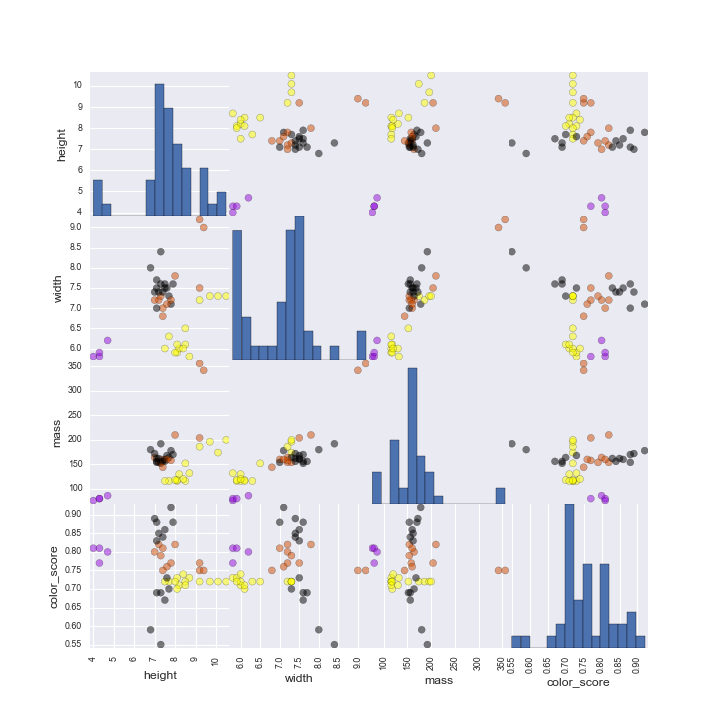

[]

In [21]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.plot()

<IPython.core.display.Javascript object>


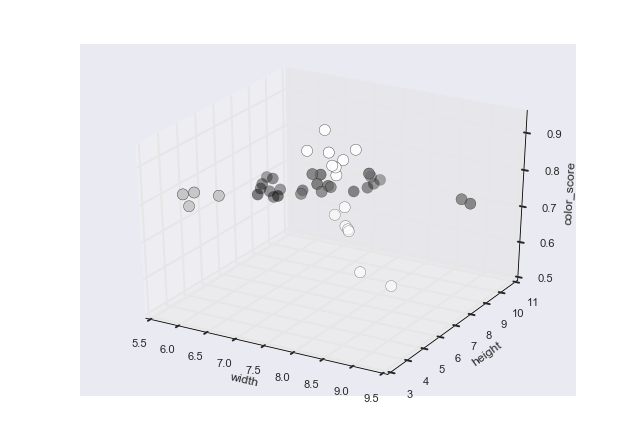

In [25]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [9]:
X_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


In [10]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

### Classification
* k-NN classifiers are an example of what's called instance based or memory based supervised learning. What this means is that instance based learning methods work by memorizing the labeled examples that they see in the training set. And then they use those memorized examples to classify new objects later.
* The k in k-NN refers to the number of nearest neighbors the classifier will retrieve and use in order to make its prediction. 
#### The k-Nearest Neighbor (k-NN) classifier algorithm
* FInd the most similar instances to X_test that are in X_train
* Get the labels of y_NN for the instances in X_NN
* predict the label by combining the labels y_NN
#### A nearest neighbor algorithm needs four things specified
1. A distance metric
2. How many nearest neighbors to look at?
3. Optional weighting function on the neighbor points
4. Method of aggregating the classes of neighbor points

### Create classifier object

In [11]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

#### Train the classifier (fit the estimator) using the training data

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Estimate the accuracy of the classifier on future data, using the test data

In [14]:
knn.score(X_test, y_test)

0.53333333333333333

#### Use the trained k-NN classifier model to classify new, previously unseen objects

In [15]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [16]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

#### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


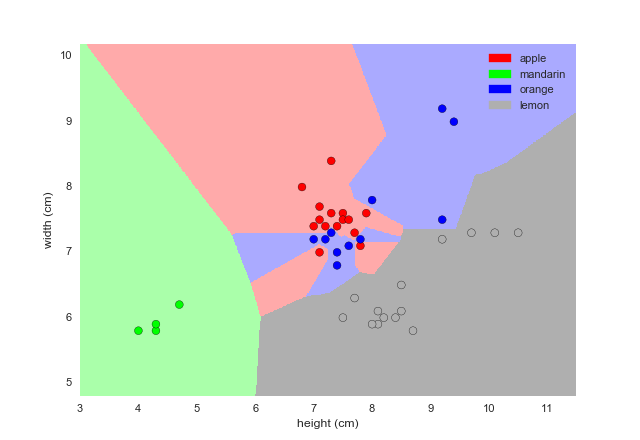

<IPython.core.display.Javascript object>


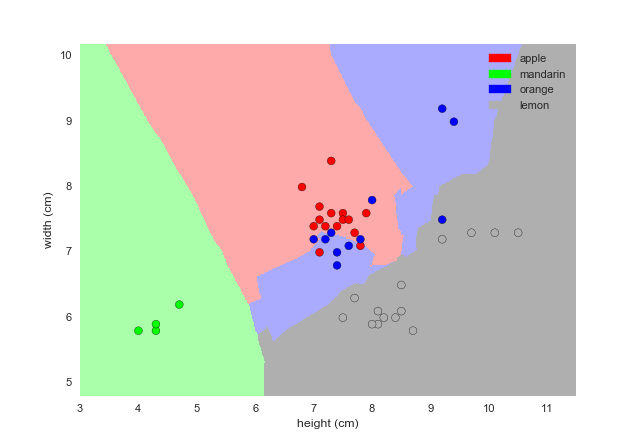

<IPython.core.display.Javascript object>


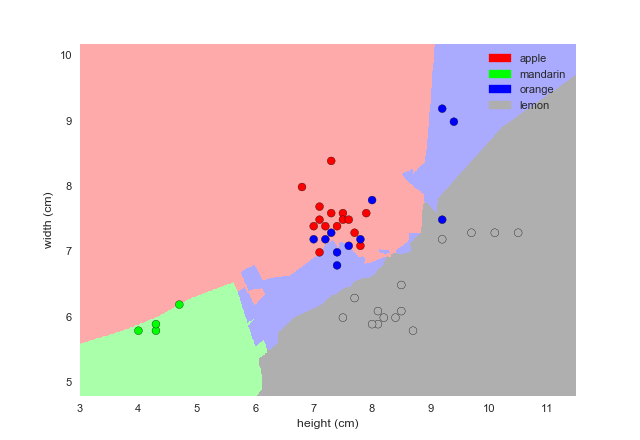

In [27]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 5 nearest neighbors
plot_fruit_knn(X_train, y_train, 5, 'uniform') 
plot_fruit_knn(X_train, y_train, 10, 'uniform') 

#### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


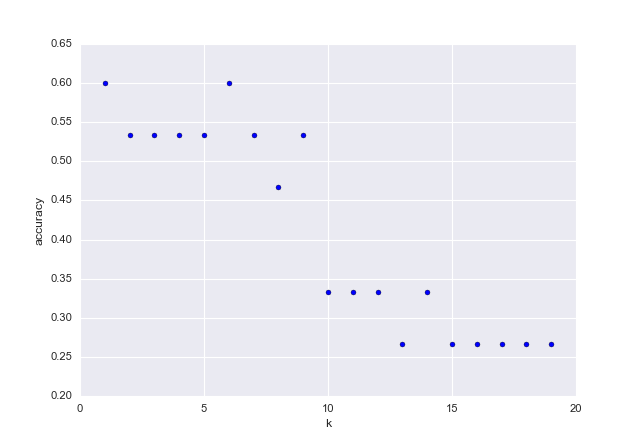

In [28]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


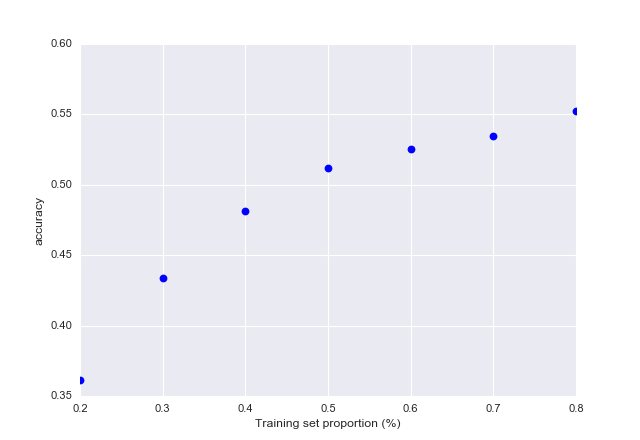

In [29]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [30]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table(r'C:\Users\kkv1\Desktop\Python\DS\Applied ML in python\Dataset\fruit_data_with_colors.txt')

X = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
print('Accuracy of knn classifier on the test set:', knn.score(X_test,y_test))

example_fruit = [[5.5,2.2,10,0.70]]
print('predicted fruit type for ', example_fruit, 'is ', knn.predict(example_fruit))


Accuracy of knn classifier on the test set: 0.533333333333
predicted fruit type for  [[5.5, 2.2, 10, 0.7]] is  [2]


Supervised learnign can be divided into two 
* Classification
* Regression
Both classification and regression take a set of training instances and learn a mapping to a target value.
* For classification, the target value is a discrete class value
        Ex: Binary: Deciding whether a transaction is fradulant or not
            Multiclass : Target value is one of a set of discrete values (the fruit dataset is a multi class)
            Multilabel : Example classifying wev pages into multiple topics
            
* For regression, the target value is continous (real-values/floating point)
        Ex: Predicting the selling prize of a house from it's attributes
    * Looking at the target value's type will guide you on what supervised learning method is to be use.
    * Many supervised learning methods have flavors for classification and Regression

#### Overfitting
Overfitting typically occurs when we try to fit a complex model with an inadequate amount of training data. An overfitted model uses its ability to capture complex patterns by being great at predicting lots and lots of specific data samples or areas of local variation in the training set. But it often misses seeing global patterns in the training set that would help it generalize well on the unseen test set. 

In general for a classifier as value of k decreases the risk of overfitting increases, this is because as k decresase say k = 1, now the classifier is affected by noise and outliers and there by decision boundary changes.

#### Underfitting
In case of under fitted model the learned model may not be even able to predict/classify the test vlaues.

#### Overfitting and Underfitting for Regression
In case of linear regresssion with an underfitted model the RSS (residual sum of saqures) is high and there by the predictions from the model will not be accurate, on the other hand in case of overfitted model that linear regression curve is of higher order with the intension of decresing the RSS but with this approach it tries to cover all the aspects but will not be able to generalize global pattern.
    
#### Overfitting and Underfitting for Classification
In case of knn classifier with an underfitted model the classification doesn't happen properly coz the model has not considered the majority of the points for classification but, on the other hand in case of overfitted model that knn boundary tries to classify considering all the points , but while doing so it may leave out the obvious global pattern i.e. in order to put a outlier point inside a particular group boundary the model would go on to extend the boundary which leads to undesired results.

<IPython.core.display.Javascript object>


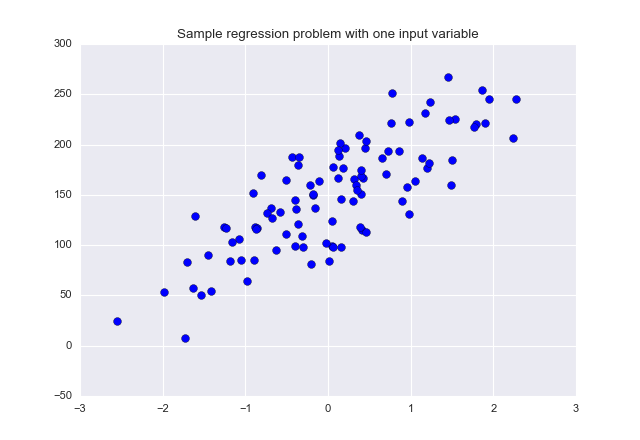

In [58]:
from sklearn.datasets import make_regression
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()

plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1,bias = 150.0, noise = 30, random_state = 0)

plt.scatter(X_R1, y_R1, marker = 'o', s= 50)
plt.show()


In [59]:
X_R1

array([[-0.35955316],
       [ 0.97663904],
       [ 0.40234164],
       [-0.81314628],
       [-0.88778575],
       [ 0.44386323],
       [-0.97727788],
       [ 0.42833187],
       [ 0.20827498],
       [-0.31155253],
       [-0.51080514],
       [ 0.12691209],
       [-1.53624369],
       [-0.40178094],
       [ 0.6536186 ],
       [ 1.17877957],
       [-0.17992484],
       [ 1.78587049],
       [ 1.45427351],
       [-0.68481009],
       [ 0.97873798],
       [ 1.89588918],
       [-0.4380743 ],
       [ 0.3130677 ],
       [ 0.76103773],
       [ 0.77749036],
       [ 1.9507754 ],
       [ 0.33367433],
       [-0.34791215],
       [ 1.53277921],
       [-0.89546656],
       [-0.57884966],
       [-1.04855297],
       [ 0.37816252],
       [ 0.01050002],
       [ 0.46278226],
       [ 0.14404357],
       [-0.40317695],
       [ 0.0519454 ],
       [-1.25279536],
       [ 1.05445173],
       [ 0.40015721],
       [-1.70627019],
       [ 2.2408932 ],
       [ 0.17742614],
       [-0

In [60]:
y_R1

array([ 120.61202772,  131.22864089,  150.56377656,  169.90502386,
        118.15657878,  196.359452  ,   63.87424131,  166.52111726,
        196.69750568,  109.35202873,  110.89907645,  167.14847479,
         50.75815986,   99.05541869,  186.6671153 ,  231.40263398,
        149.87252122,  220.18993612,  267.54737632,  136.60775075,
        222.40878201,  221.6995233 ,  187.9326153 ,  165.9614544 ,
        220.99830581,  251.48432189,  245.10159929,  159.37894068,
        187.46117173,  225.78043885,   85.72429807,  133.31521903,
         85.72342625,  209.37368061,   83.89422598,  203.09341316,
        201.83216387,  145.006712  ,   99.17872228,  118.32635079,
        163.72617769,  168.56121251,   83.60815569,  206.67171997,
        177.05657699,   81.58089881,  242.46512421,  117.24433728,
        217.53804156,  115.11167787,  151.72729127,   54.40609236,
        112.71980976,  143.60486968,  186.76850282,  174.28756631,
        117.76643281,    8.00651601,  224.52395686,  150.68774

* n_samples = 100 is the number of samples you want to generate
* n_features = 1 is the number of columns you want for your variable in the above case X_R1, as of now it has 1 column if 2 then 2 columns will be created
* n_informative = 1, The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
* bias = 150.0, The bias term in the underlying linear model. [i think it is the difference between X_R1 and y_R1]
* noise = 30 The standard deviation of the gaussian noise applied to the output.
* random_state = 0 

<IPython.core.display.Javascript object>


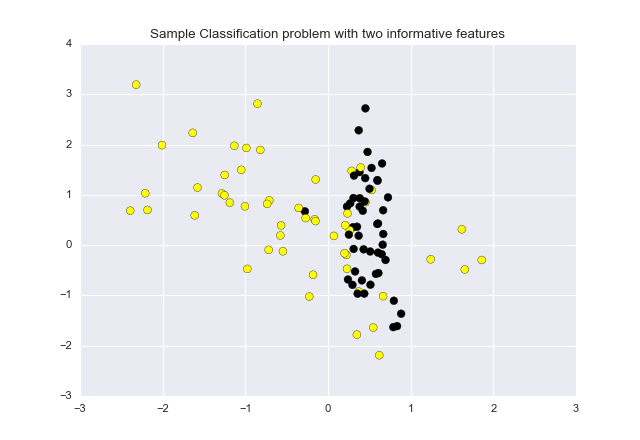

In [40]:
from sklearn.datasets import make_classification
plt.figure()

plt.title('Sample Classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, 
                                 n_informative = 2, n_redundant = 0, 
                                 n_clusters_per_class = 1 , flip_y = 0.1, 
                                 class_sep = 0.5, random_state = 0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [43]:
X_C2#[: , 0]

array([[ 0.37163989, -0.92276158],
       [-0.1617182 ,  0.51386743],
       [-1.63650855,  2.23389996],
       [ 0.62041909, -2.18941375],
       [-0.98718544,  1.93299453],
       [-0.14918509,  1.30535614],
       [ 1.61878776,  0.31495229],
       [-2.0077599 ,  1.98857017],
       [ 0.51055071, -0.12656384],
       [ 0.41002859, -0.70119016],
       [ 0.52751248,  1.0967429 ],
       [ 0.59985786,  1.28037474],
       [ 0.45312252,  0.85489986],
       [-1.00514147,  0.77186707],
       [ 0.47834537,  1.85361297],
       [ 0.29625824, -0.78978825],
       [ 0.32783482, -0.5227981 ],
       [ 0.60447379, -0.14882659],
       [ 0.50205696,  1.12159087],
       [ 0.60563412,  0.42995032],
       [-1.28273822,  1.02817583],
       [ 0.30764063,  0.93661465],
       [ 0.38097545,  1.45206938],
       [ 0.35846584, -0.9653136 ],
       [ 0.3016695 ,  0.35707675],
       [ 0.64998136, -0.17995055],
       [-0.15122279,  0.47865617],
       [ 0.45000368,  1.33240861],
       [ 0.2858526 ,

In [44]:
y_C2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0])

In [55]:
print(len(X_C2),len(y_C2))

100 100
